# Linear Regression

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:

x_train=np.array([1.0,1.5,2.0,2.5,3.0,3.5])
y_train=np.array([400,700,900,1100,1350,1600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1.  1.5 2.  2.5 3.  3.5]
y_train=[ 400  700  900 1100 1350 1600]


In [22]:
# printing the number of training examples here

print(f"x_train shape:{x_train.shape}")
print(f"x_train shape:{x_train.shape[0]}")

# 6 elements in x_train

x_train shape:(6,)
x_train shape:6


In [25]:
i=0
x_i=x_train[i]
y_i=y_train[i]
print(f"{x_i}===={y_i}")

1.0====400


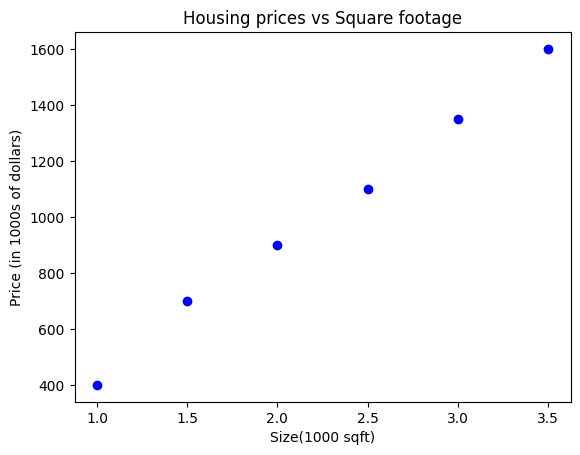

In [ ]:
# plotting the points

plt.scatter(x_train,y_train,c='b') #plots  the data points

plt.title("Housing prices vs Square footage") # title of the graph

plt.xlabel("Size(1000 sqft)")

plt.ylabel("Price (in 1000s of dollars)") #setting the labels of X and Y axes

plt.show()


In [31]:
w=400
b=100

def compute_model_output(x,w,b):
    '''computes prediction of the linear model
      Params:
          x=np array of size m
          w , b are the scalars(model parameters)     
          y is the target value
    '''

    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

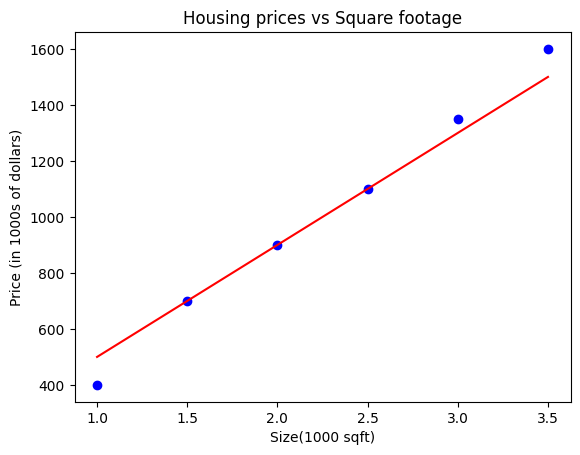

In [32]:
temp_f_wb=compute_model_output(x_train,w,b)

plt.plot(x_train,temp_f_wb,c='r',label="Our Prediction")

plt.scatter(x_train,y_train,c='b',label="Actual values") #plots  the data points

plt.title("Housing prices vs Square footage") # title of the graph

plt.xlabel("Size(1000 sqft)")

plt.ylabel("Price (in 1000s of dollars)") #setting the labels of X and Y axes

plt.show()


In [34]:
#For the prediction 
x_i=1.2
cost=x_i*w+b
print(f"Cost of the 1200 sq ft house is {cost} (in 1000s of dollars)")

Cost of the 1200 sq ft house is 580.0 (in 1000s of dollars)
